<h2><font color="#004D7F" size=6>Module 2. Data Analysis</font></h2>

<h1><font color="#004D7F" size=5>3. Data Visualization</font></h1>

<h2><font color="#004D7F" size=5>Index</font></h2>
<a id="indice"></a>

* [1. Introduction](#section1)
    * [1.1. Load the dataset](#section11)
* [2. Univariate Visualization](#section2)
    * [2.1. Histograms](#section21)
    * [2.2. Density Plots](#section22)
    * [2.3. Boxplots](#section23)
* [3. Multivariate Visualization](#section3)
    * [3.1. Correlation Matrix](#section31)
    * [3.2. Scatter Matrix](#section32)
    * [3.3. Scatter Matrix by Class](#section33)
    * [3.4. Boxplot by Class](#section34)

---
<a id="section1"></a>
# <font color="#004D7F">1. Introduction</font>

The first thing we should do when working with machine learning is to visualize our data to understand its behavior and distribution. This initial data observation enables us to learn more about them, providing the quickest and most useful way to determine which techniques are most suitable in preprocessing and post-processing. In this sense, in this third section we will work on:

* How to create graphics to understand each attribute independently.
* How to create graphics to understand the relationships between different attributes.

Graphics of the relationships between attributes can give us an idea of redundant attributes, necessary resampling methods, and ultimately, the difficulty of a prediction problem. To do this, the visualization phase can be divided into the following parts:

* **Univariate Visualization**: When we want to visualize an attribute independently of the others.
* **Multivariate Visualization**: When we want to visualize the interaction between the different attributes of our dataset.

<a id="section11"></a>
## <font color="#004D7F">1.1. Load the Dataset</font>

For this practice, we will load the Pima Indian Diabetes dataset to make observations with descriptive statistics functions.

In [3]:
import pandas as pd

filename = 'data/pima-indians-diabetes.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

data = pd.read_csv(filename, names=names)

<a id="section2"></a>
# <font color="#004D7F">2. Univariate Visualization</font>

As mentioned earlier, univariate plots allow us to visualize individual attributes without interactions, with the main goal being to learn about the distribution, trend, and spread of each attribute.

Below are the most relevant ones.

<a id="section21"></a>
## <font color="#004D7F">2.1. Histograms</font>

From the shape of the bins, you can quickly get an idea of whether an attribute is Gaussian, skewed, or even has an exponential distribution. It can also help you see possible outliers, so Matplotlib is a powerful data visualization library.

/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_4421/1093127310.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


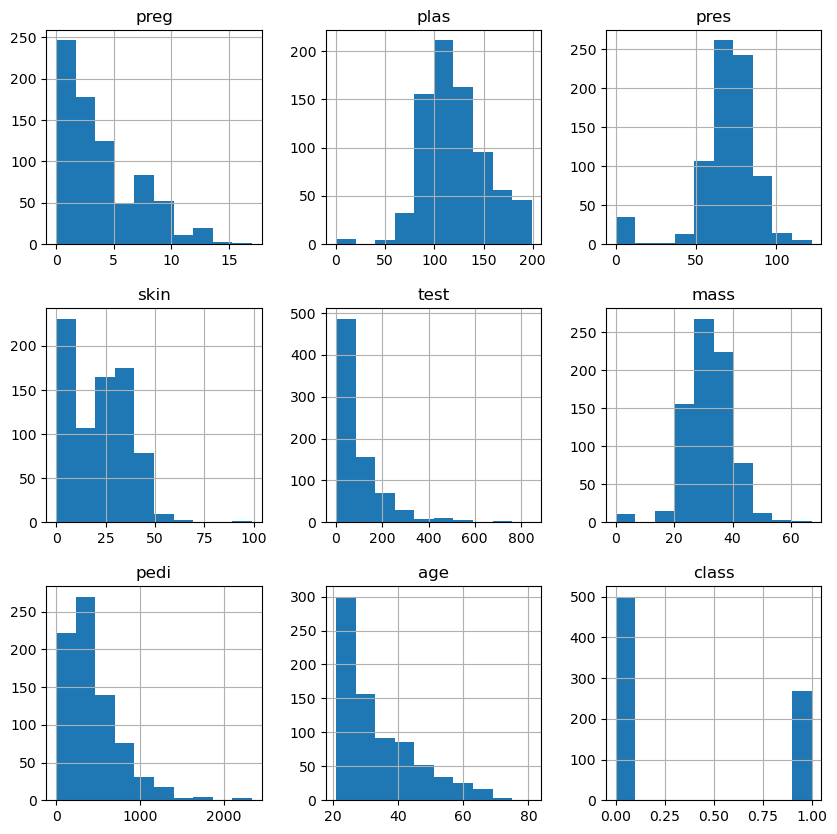

In [7]:
%matplotlib inline
# Univariable Histograms
import matplotlib.pyplot as ptl

fig = ptl.figure(figsize = (10,10))
ax = fig.gca() # Make the figure bigger

data.hist(ax=ax)
ptl.show()

We can observe that possibly the attributes `age`, `pedi`, and `test` may have an exponential distribution. We can also note that possibly the attributes `mass`, `pres`, and `plas` may have a Gaussian or nearly Gaussian distribution. This is relevant because many machine learning techniques assume a univariate Gaussian distribution in the input variables.

This same representation can be achieved using the [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html) package. Seaborn is a more advanced visualization package than Matplotlib, and it also uses Matplotlib as its foundation. With Seaborn, we can see histograms along with a density line that shows the distribution.

<Axes: xlabel='class', ylabel='Density'>

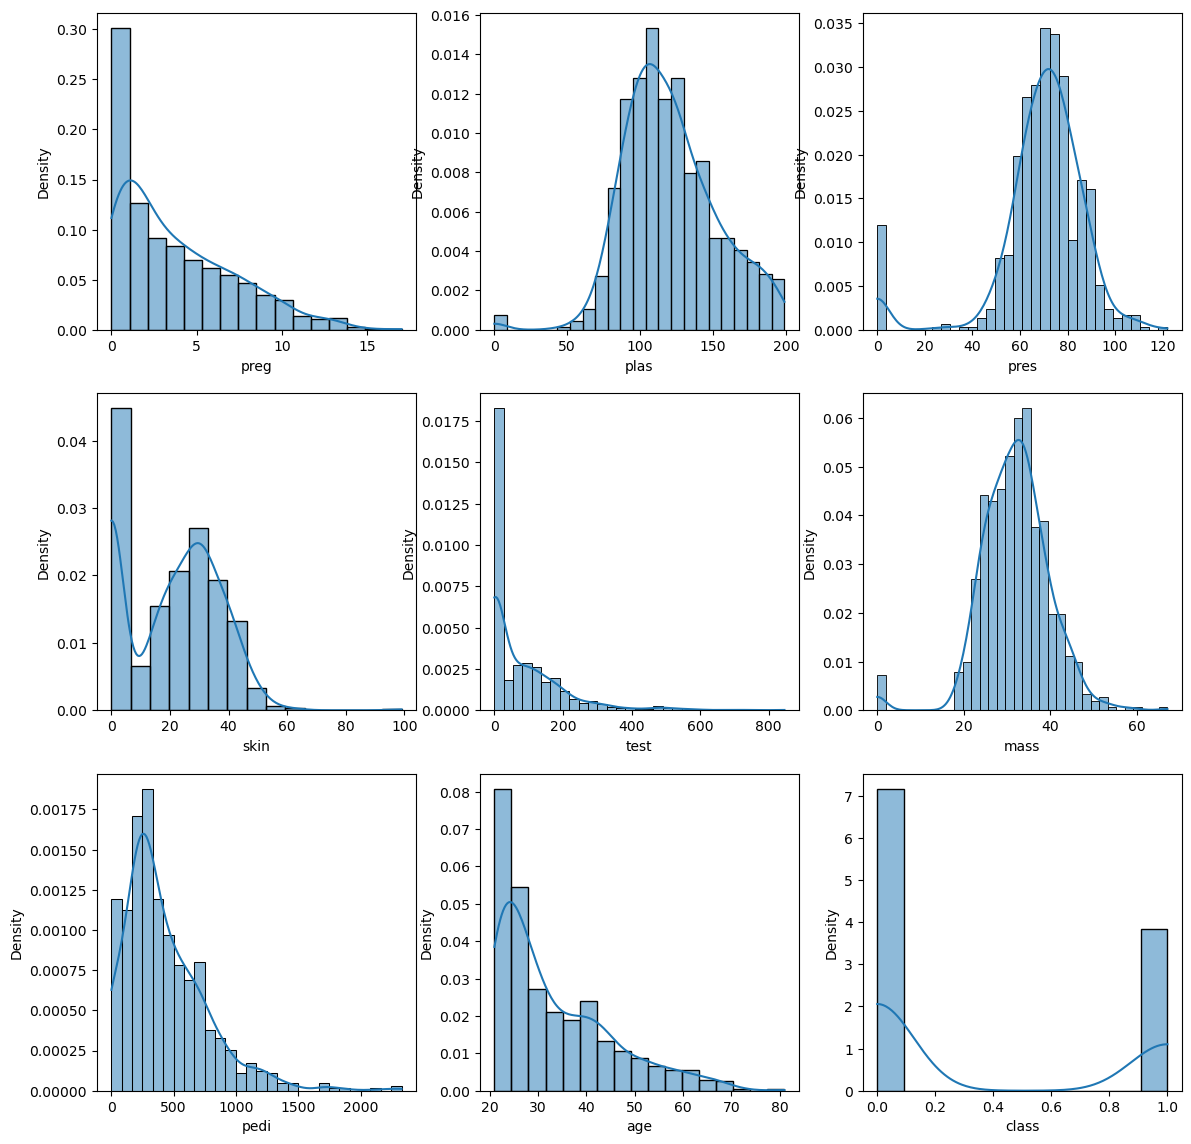

In [21]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(data["preg"], ax=ax[0, 0], kde=True, stat="density")
sns.histplot(data["plas"], ax=ax[0, 1], kde=True, stat="density")
sns.histplot(data["pres"], ax=ax[0, 2], kde=True, stat="density")
sns.histplot(data["skin"], ax=ax[1, 0], kde=True, stat="density")
sns.histplot(data["test"], ax=ax[1, 1], kde=True, stat="density")
sns.histplot(data["mass"], ax=ax[1, 2], kde=True, stat="density")
sns.histplot(data["pedi"], ax=ax[2, 0], kde=True, stat="density")
sns.histplot(data["age"], ax=ax[2, 1], kde=True, stat="density")
sns.histplot(data["class"], ax=ax[2, 2], kde=True, stat="density")


<a id="section22"></a>
## <font color="#004D7F">2.2. Density Plot </font>

The plots look like an abstract histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms. We can see that the distribution of each attribute is clearer than the histograms.

/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_4421/2830552187.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax,kind='density',subplots= True,layout = (3,3),sharex = False)


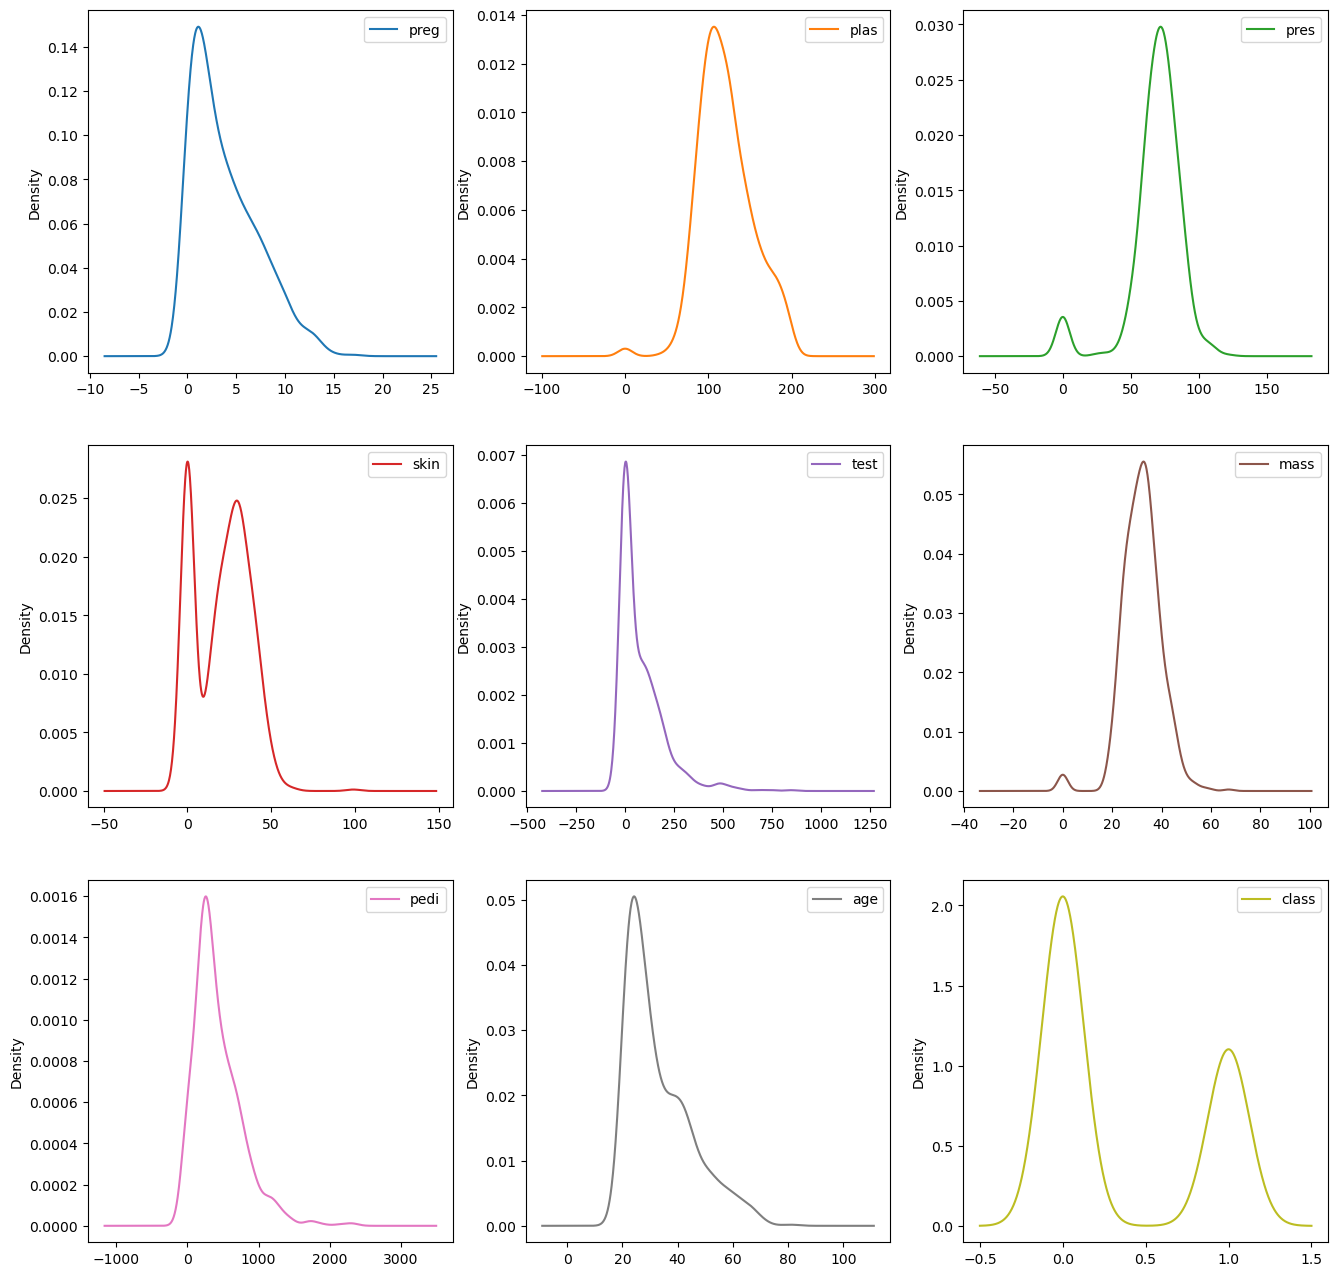

In [22]:
%matplotlib inline
# Univarate Histograms
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
data.plot(ax=ax,kind='density',subplots= True,layout = (3,3),sharex = False)
plt.show()

<a id="section23"></a>
   ## <font color="#004D7F">2.3. Boxplots </font>

We can see that the spread of the attributes is quite different. Some like `age`, `test`, and `skin` appear quite skewed towards smaller values.

/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_4421/4270957642.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax,kind='box',subplots= True,layout = (3,3),sharex = False)


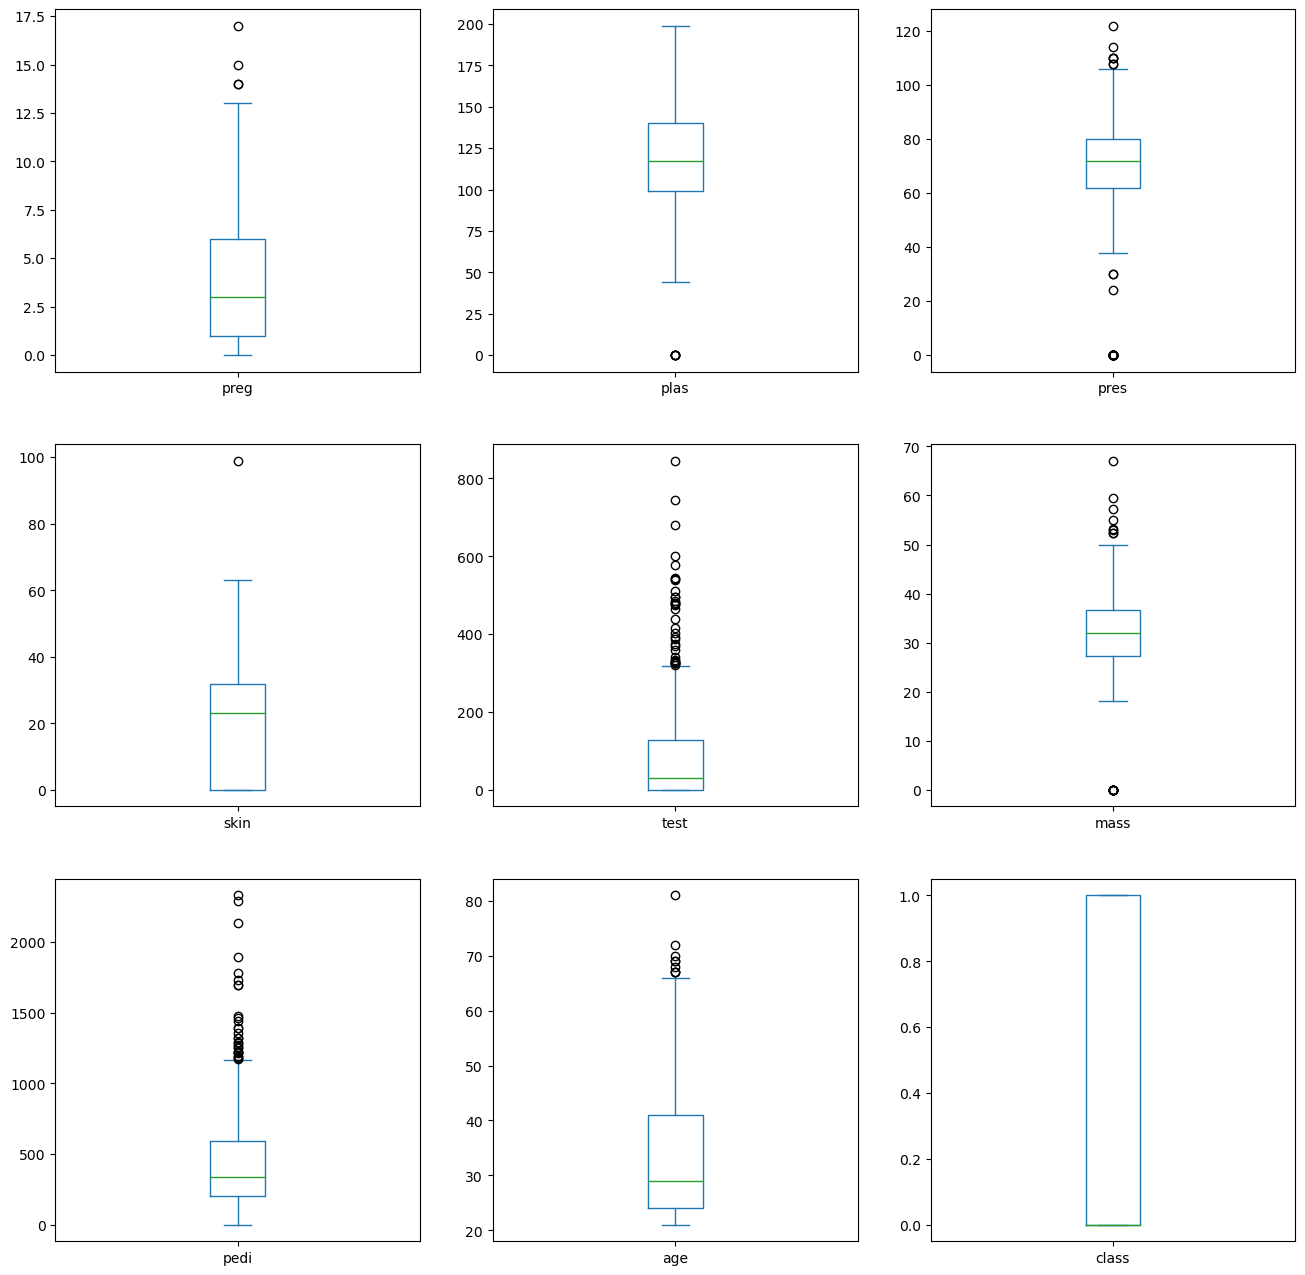

In [23]:
%matplotlib inline
# Univarate Boxplot
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
data.plot(ax=ax,kind='box',subplots= True,layout = (3,3),sharex = False)
plt.show()

<a id="section3"></a>
# <font color="#004D7F">3. Multivariable Visualization</font>

Multivariable visualizations are the charts where we can analyze the relationship or interactions between attributes. The goal is to learn something about the distribution, trend, and distribution in data groups, usually pairs of attributes.


<a id="section31"></a>
## <font color="#004D7F">3.1. Correlation Matrix </font>

We can see that the matrix is symmetric, i.e., the lower left part of the matrix is the same as the upper right part. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with itself (as expected) on the diagonal line from the upper left to the lower right.


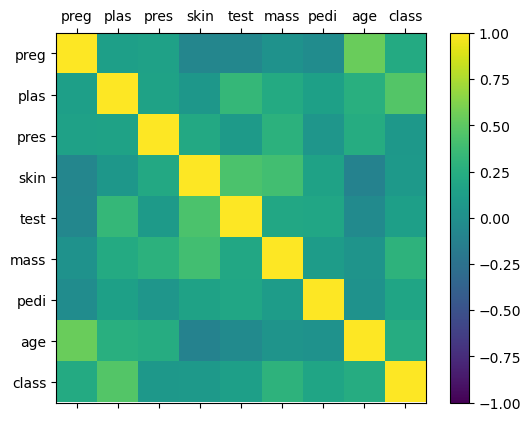

In [30]:
import numpy as np
%matplotlib inline
# Correlation matrix plotlib
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

With Seaborn:

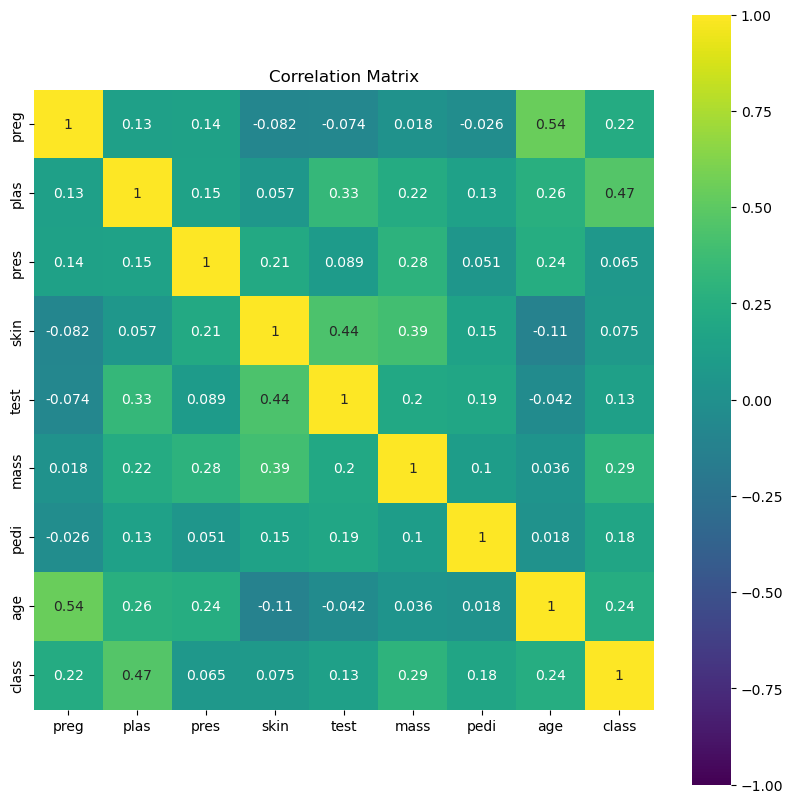

In [32]:
%matplotlib inline
correlation = data.corr()
plt.figure(figsize=(10,10))
ax =sns.heatmap(correlation,vmax=1,vmin=-1,square=True,annot=True,cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

<a id="section32"></a>
## <font color="#004D7F">3.2. Scatter Matrix</font>

Similar to the previous correlation matrix plot, the scatter matrix plot is symmetric. This is useful for looking at pairwise relationships from different perspectives. Since it doesn't make much sense to draw a scatter plot of each variable against itself, the diagonal shows histograms of each attribute.


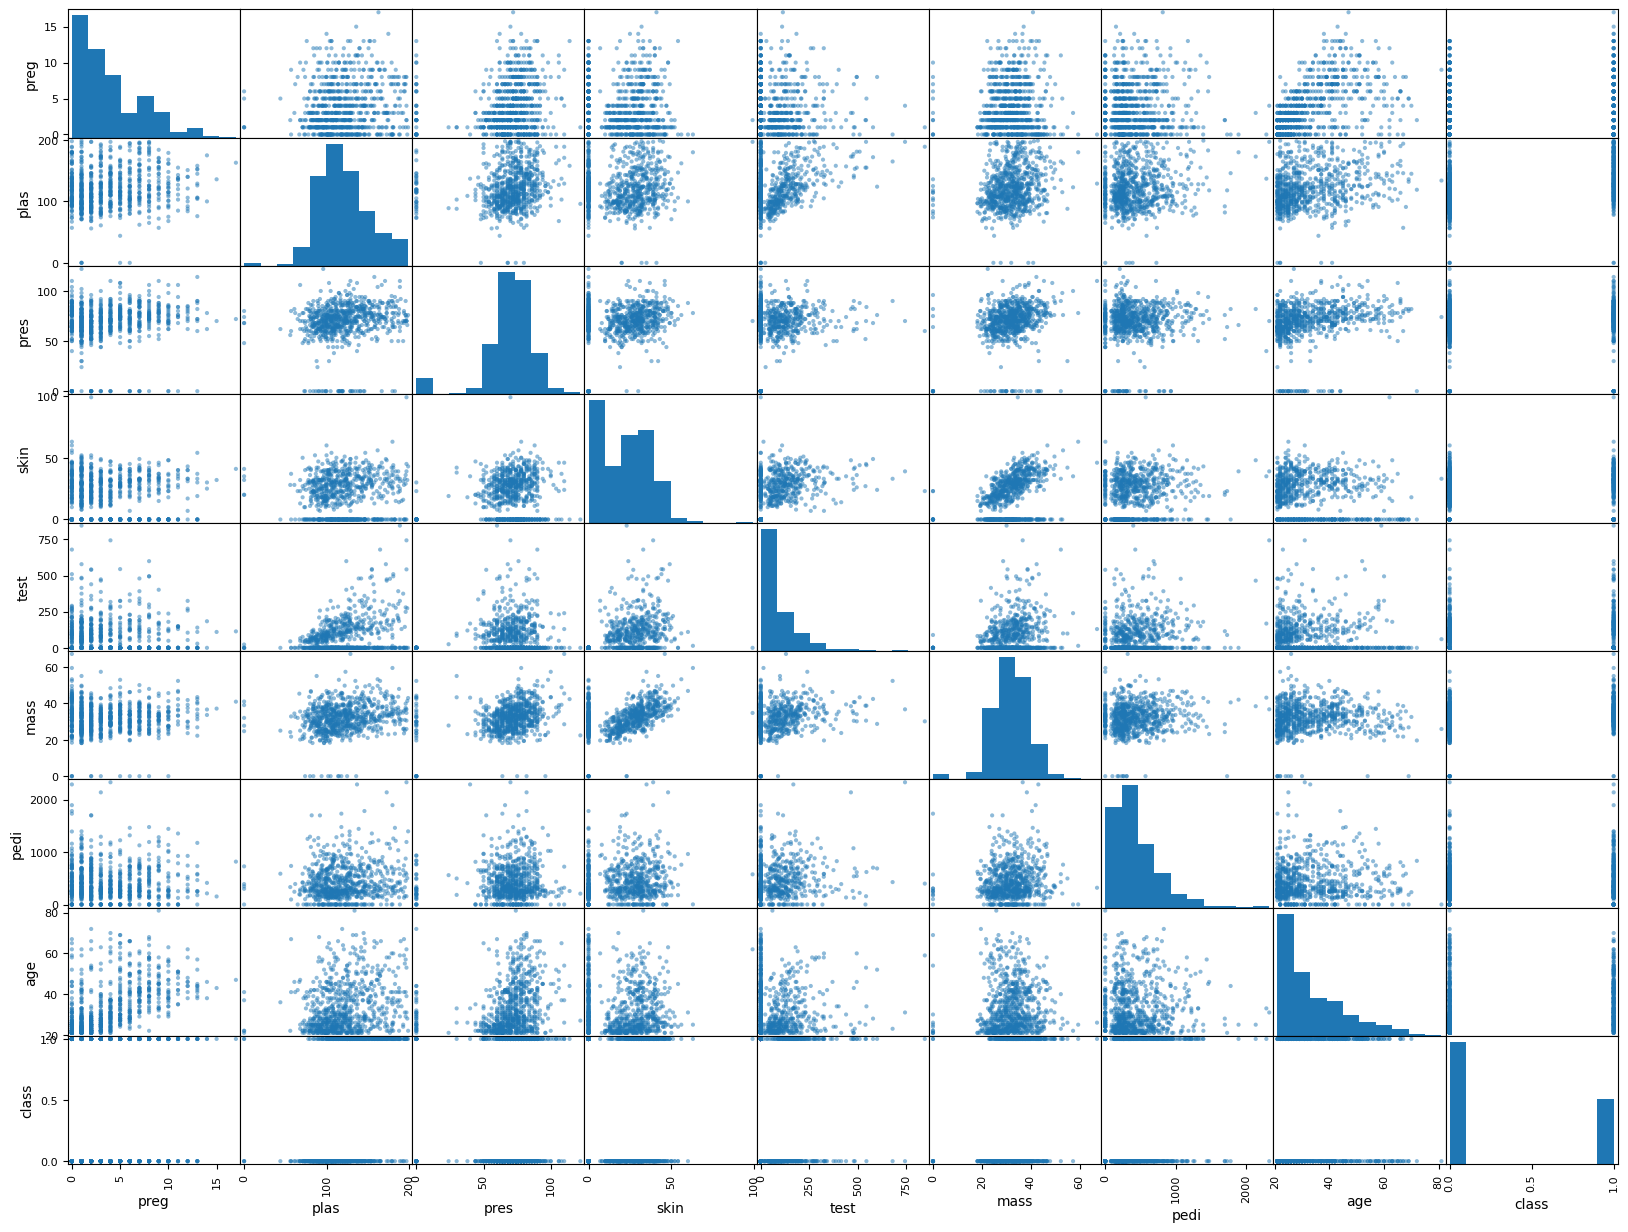

In [35]:
%matplotlib inline
# Correlation matrix plotlib
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"] = [20,15]
scatter_matrix(data)
plt.show()

With Seaborn:

In [ ]:
%matplotlib inline
# Correlation Matrix Seaborn
sns.pairplot(data)